<a href="https://colab.research.google.com/github/moises-rb/DS_ONE/blob/main/Estatistica_MachineLearning/6%20-%20Classificacao_Validacao_Modelos_Metricas_Avaliacao/Projeto_Classifica%C3%A7%C3%A3o_Valida%C3%A7%C3%A3o_e_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

### Primeira etapa

Leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [71]:
import pandas as pd

In [72]:
url = 'https://raw.githubusercontent.com/moises-rb/DS_ONE/refs/heads/main/Estatistica_MachineLearning/6%20-%20Classificacao_Validacao_Modelos_Metricas_Avaliacao/base_dados/emp_automovel.csv'

In [73]:
dados = pd.read_csv(url)
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [74]:
 x = dados.drop('inadimplente', axis=1)
 y = dados['inadimplente']

### Segunda etapa

Realizar a divisão dos dados entre treino e teste.

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, random_state=5, stratify=y)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, random_state=5, stratify=y)

### Terceira etapa

Criar 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avaliar a acurácia de treino, validação e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Algoritmo [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [78]:
arvore = DecisionTreeClassifier()
arvore.fit(x, y)
arvore.score(x, y)

1.0

In [79]:
print(f'Acurácia do modelo: {arvore.score(x, y) * 100:.2f}%')

Acurácia do modelo: 100.00%


In [80]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)
print(f'Acurácia do treino: {arvore.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {arvore.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 100.00%
Acurácia de validação: 84.80%


In [81]:
arvore = DecisionTreeClassifier(max_depth=10)
arvore.fit(x_treino, y_treino)
print(f'Acurácia do treino: {arvore.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {arvore.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 92.06%
Acurácia de validação: 90.58%


Algoritmo [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [82]:
random_forest = RandomForestClassifier(max_depth = 10)
random_forest.fit(x_treino, y_treino)
print(f'Acurácia do treino: {random_forest.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {random_forest.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 91.54%
Acurácia de validação: 91.29%


In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
previsao_arvore = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_arvore)
print(matriz_confusao)

[[10359   120]
 [  961    41]]


In [85]:
previsao_random = random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_random)
print(matriz_confusao)

[[10478     1]
 [  999     3]]


### Quarta etapa

Construir uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

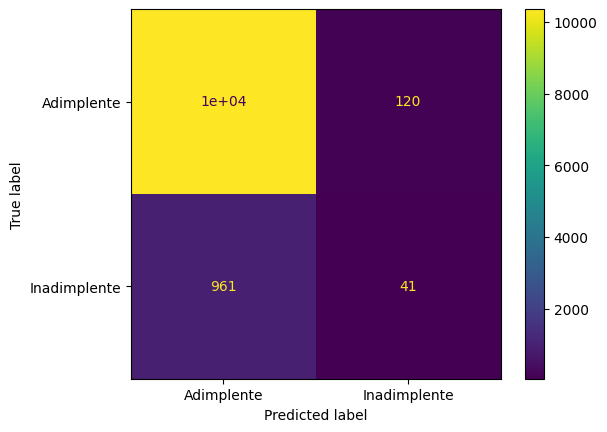

In [87]:
previsao_arvore = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_arvore)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

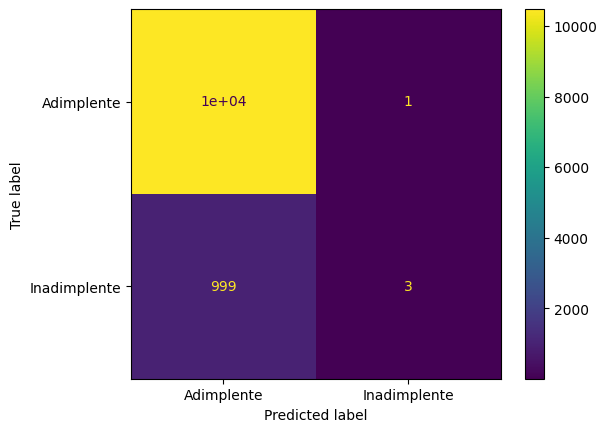

In [88]:
previsao_random = random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_random)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

### Quinta etapa

Calculando a Acurácia, Precisão e Recall

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
print(f'Acurácia da validação: {accuracy_score(y_val, previsao_arvore) * 100:.2f}%')

Acurácia da validação: 90.58%


In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
print(f'Precisão da validação: {precision_score(y_val, previsao_arvore) * 100:.2f}%')
print(f'Recall da validação: {recall_score(y_val, previsao_arvore) * 100:.2f}%')

Precisão da validação: 25.47%
Recall da validação: 4.09%


In [93]:
from sklearn.metrics import f1_score

In [94]:
print(f'F1 da validação: {f1_score(y_val, previsao_arvore) * 100:.2f}%')

F1 da validação: 7.05%


### Sexta etapa

Construindo a Curva ROC

In [95]:
from sklearn.metrics import RocCurveDisplay

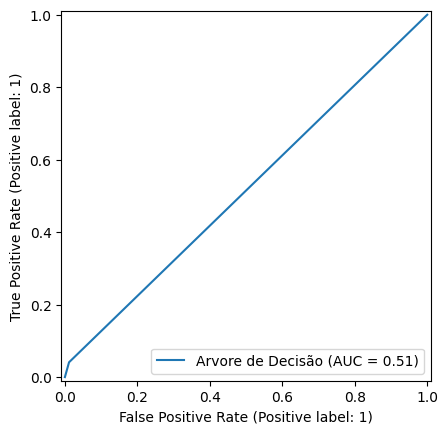

In [96]:
RocCurveDisplay.from_predictions(y_val, previsao_arvore, name='Arvore de Decisão');

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
print(f'AUC da validação: {roc_auc_score(y_val, previsao_arvore) * 100:.2f}%')

AUC da validação: 51.47%


### Sétima etapa

Construindo a Curva de Precisão x Recall

In [99]:
from sklearn.metrics import PrecisionRecallDisplay

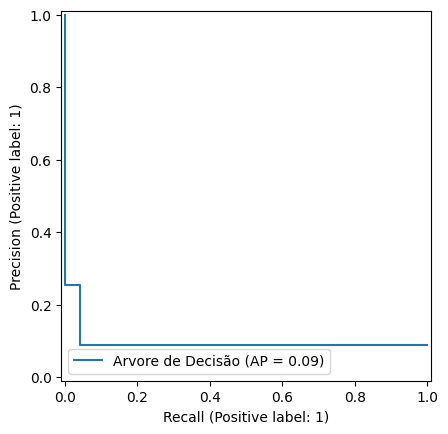

In [100]:
PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name='Arvore de Decisão');

In [101]:
from sklearn.metrics import average_precision_score

In [102]:
print(f'AP da Validação: {average_precision_score(y_val, previsao_arvore) * 100:.2f}%')

AP da Validação: 9.41%


### Oitava etapa

Construindo ao Relatório de Métricas

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(f'classification_report: \n{classification_report(y_val, previsao_arvore)}')

classification_report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



### Nona etapa

Construindo Validação Cruzada

In [105]:
from sklearn.model_selection import cross_validate, KFold

In [106]:
previsao_arvore = DecisionTreeClassifier(max_depth=10)
previsao_random = RandomForestClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(previsao_arvore, x, y, cv=kf)
cv_resultados

{'fit_time': array([0.24418163, 0.23509812, 0.22924066, 0.23693681, 0.25637341]),
 'score_time': array([0.00354242, 0.00370073, 0.00345612, 0.00348139, 0.00348902]),
 'test_score': array([0.91268372, 0.90733885, 0.90744774, 0.91321864, 0.89906359])}

In [107]:
cv_resultados['test_score']

array([0.91268372, 0.90733885, 0.90744774, 0.91321864, 0.89906359])

In [108]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{(media - 2*desvio_padrao)* 100:.2f}% , {min(media + 2*desvio_padrao, 1)* 100:.2f}%]')

Intervalo de confiança: [89.78% , 91.81%]


### Décima etapa

Construindo Validação Cruzada com Recall

In [109]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{(media - 2*desvio_padrao)* 100:.2f}% , {min(media + 2*desvio_padrao, 1)* 100:.2f}%]')

In [110]:
previsao_arvore = DecisionTreeClassifier(max_depth=10)
previsao_random = RandomForestClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(previsao_arvore, x, y, cv=kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.24043584, 0.23364973, 0.22854686, 0.2481184 , 0.23530173]),
 'score_time': array([0.00761151, 0.0058701 , 0.00597858, 0.00599313, 0.00614047]),
 'test_score': array([0.02642008, 0.01608911, 0.01845018, 0.0156658 , 0.02312139])}

In [111]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [1.16% , 2.83%]


In [112]:
previsao_arvore = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(previsao_arvore, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.23959613, 0.23786664, 0.24439716, 0.23340416, 0.24619889]),
 'score_time': array([0.0164032 , 0.01395226, 0.01393795, 0.01217389, 0.02173162]),
 'test_accuracy': array([0.91301034, 0.90788328, 0.90679443, 0.91343641, 0.89939024]),
 'test_recall': array([0.02642008, 0.01980198, 0.01845018, 0.0156658 , 0.02427746]),
 'test_precision': array([0.24390244, 0.22857143, 0.20547945, 0.22641509, 0.20792079]),
 'test_f1': array([0.0476758 , 0.03644647, 0.03386005, 0.02930403, 0.04347826])}

In [113]:
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [114]:
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.8978970568416919, 0.9183088224987722]
Intervalo de confiança(test_recall): [0.013101081650668726, 0.02874511713019086]
Intervalo de confiança(test_precision): [0.19399736934267284, 0.25091831308510465]
Intervalo de confiança(test_f1): [0.02492603404180785, 0.051379809597317916]


In [115]:
dados['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [116]:
from sklearn.model_selection import StratifiedKFold

In [117]:
previsao_arvore = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(previsao_arvore, x, y, cv=skf, scoring='recall')

In [118]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [1.75% , 3.88%]


### Décima Primeira etapa

Construindo Balanceamento de Dados

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [121]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


In [122]:
previsao_arvore = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(previsao_arvore, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [123]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [69.96% , 76.42%]


### Décima Segunda etapa

Construindo Pipeline para validação

In [124]:
from imblearn.pipeline import Pipeline as imbpipeline

In [125]:
previsao_arvore = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', previsao_arvore)])

In [126]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [127]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [23.85% , 32.22%]


In [129]:
from imblearn.under_sampling import NearMiss

In [130]:
previsao_arvore = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', previsao_arvore)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [131]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [62.13% , 69.92%]


## Avaliação Final - Testando o Modelo

In [132]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
previsao_arvore = modelo.predict(x_teste)

In [133]:
print(classification_report(y_teste, previsao_arvore))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



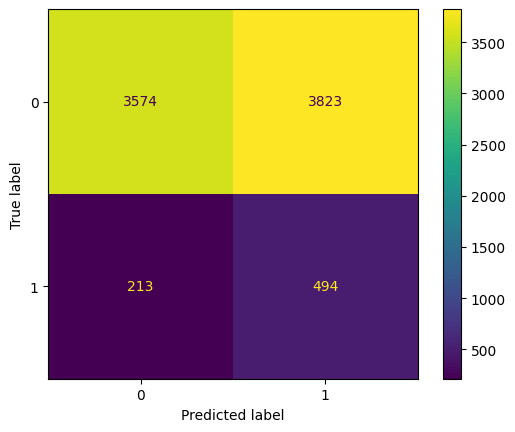

In [134]:
ConfusionMatrixDisplay.from_predictions(y_teste, previsao_arvore);